



## BikeEase Rental Analysis & Insights
-----
## Task 1: Project Overview & Objectives
This notebook analyzes bike rental data for BikeEase to understand rental patterns, identify key trends, and provide actionable insights for business optimization.

#  Objectives: 
1.  **Clean and Process** the dataset.
2.  Perform Statistical Analysis to understand data distributions.
3.  Use Pandas to analyze trends related to seasons, holidays, and time of day.
4.  Visualize the data to uncover patterns and correlations.
5.  Provide Actionable Recommendations for the business.


-----



## Task 2: Import Libraries, Load and Prepare Data


In [1]:
# =======================================================
# Import Libraries, Load and Prepare Data
# =======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv('FloridaBikeRentals.csv', encoding='latin1')

# =======================================================
# MEMORY OPTIMIZATION CODE HERE
# =======================================================
print("--- Memory Usage Before Optimization ---")
print(df.info(memory_usage='deep'))

for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')
    df[col] = pd.to_numeric(df[col], downcast='float')

print("\n--- Memory Usage After Optimization ---")
print(df.info(memory_usage='deep'))


# =======================================================
# --- Data Cleaning ---
# =======================================================
# Check for missing values and duplicates
print(f"Number of missing values: {df.isnull().sum().sum()}")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# Check for missing values and duplicates (already confirmed to be zero)
df_cleaned = df.copy()  # Create a clean copy before processing

# =======================================================
# EXPORT THE CLEANED JSON and CSV FILE
# =======================================================
df.to_json("bike_rental_cleaned.json", orient="records", lines=True)
df.to_csv("bike_rental_cleaned.csv", index=False)


# =======================================================
# --- Data Processing ---
# =======================================================
# Create a copy for processing to keep the original intact
df_processed = df.copy()

# 1. Standardize Temperature by multiplying by 10
df_processed['Temperature(°C)'] = df_processed['Temperature(°C)'] * 10

# 2. Scale Visibility using Min-Max scaling
vis_min = df_processed['Visibility (10m)'].min()
vis_max = df_processed['Visibility (10m)'].max()
df_processed['Visibility (10m)'] = (df_processed['Visibility (10m)'] - vis_min) / (vis_max - vis_min)

print("\n--- First 5 rows of processed data ---")
display(df_processed.head())

print("\n--- Statistical Summary of Key Columns ---")
display(df_processed[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']].describe())

# =======================================================
# Export the processed data to the required CSV file
# =======================================================
df_processed.to_csv("bike_rental_processed.csv", index=False)

--- Memory Usage Before Optimization ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functio

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-52.0,37,2.2,1.0,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-55.0,38,0.8,1.0,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-60.0,39,1.0,1.0,-17.700001,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-62.0,40,0.9,1.0,-17.600000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-60.0,36,2.3,1.0,-18.600000,0.0,0.0,0.0,Winter,No Holiday,Yes



--- Statistical Summary of Key Columns ---


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,128.829224,58.226256,1.724909
std,644.997468,119.448181,20.362413,1.036305
min,0.000000,-178.000000,0.000000,0.000000
25%,191.000000,35.000000,42.000000,0.900000
50%,504.500000,137.000000,57.000000,1.500000
75%,1065.250000,225.000000,74.000000,2.300000
max,3556.000000,394.000000,98.000000,7.400000


### Columns Unsuitable for Statistical Analysis

Based on the `.describe()` output, several columns were automatically excluded because they are non-numerical. These columns are not suitable for direct statistical analysis (like calculating a mean or standard deviation).

* **Unsuitable Columns:** `Date`, `Seasons`, `Holiday`, `Functioning Day`.

#### Recommendations for Datatype Changes:
* **Date:** This column should be converted to a `datetime` type for any time-series analysis. This allows for proper sorting, filtering, and resampling by time periods.
* **Seasons, Holiday, Functioning Day:** These are categorical variables. For better memory efficiency and to make them compatible with certain plotting libraries, they should be converted to the `category` datatype using `df['ColumnName'] = df['ColumnName'].astype('category')`.

-----

## Task 3: Data Analysis with Pandas

Here we explore rental patterns across different categorical features like seasons, holidays, and hours of the day.


-----


In [3]:
# =======================================================
# Group by Seasons to find the average rented bike count
# =======================================================
seasonal_avg = df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending=False).reset_index()
print("--- Average Rented Bike Count by Season ---")
display(seasonal_avg)

# Analyze trends across Holiday vs. Non-Holiday
holiday_avg = df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
print("\n--- Average Rented Bike Count by Holiday ---")
display(holiday_avg)

# Analyze trends across Functioning Day vs. No Functioning Day
functioning_day_avg = df.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index()
print("\n--- Average Rented Bike Count by Functioning Day ---")
display(functioning_day_avg)

# Analyze bike rentals by hour
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()
print("\n--- Average Rented Bike Count by Hour ---")
display(hourly_avg.head()) # Display first 5 hours for brevity

--- Average Rented Bike Count by Season ---


,Seasons,Rented Bike Count
0,Summer,1034.073370
1,Autumn,819.597985
2,Spring,730.031250
3,Winter,225.541204



--- Average Rented Bike Count by Holiday ---


,Holiday,Rented Bike Count
0,Holiday,499.756944
1,No Holiday,715.228026



--- Average Rented Bike Count by Functioning Day ---


,Functioning Day,Rented Bike Count
0,No,0.000000
1,Yes,729.156999



--- Average Rented Bike Count by Hour ---


,Hour,Rented Bike Count
0,0,541.460274
1,1,426.183562
2,2,301.630137
3,3,203.331507
4,4,132.591781


-----
## Task 3 (Continued): Categorical Encoding and Export
-----

In [4]:

# =======================================================
# Encode categorical variables using one-hot encoding
# =======================================================
df_encoded = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

# Export the encoded DataFrame to a CSV file
df_encoded.to_csv('Rental_Bike_Data_Dummy.csv', index=False)

print("--- Data successfully encoded and exported to Rental_Bike_Data_Dummy.csv ---")
display(df_encoded.head())

--- Data successfully encoded and exported to Rental_Bike_Data_Dummy.csv ---


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.600000,0.0,0.0,0.0,False,False,True,True,True
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.600000,0.0,0.0,0.0,False,False,True,True,True
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.700001,0.0,0.0,0.0,False,False,True,True,True
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.600000,0.0,0.0,0.0,False,False,True,True,True
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.600000,0.0,0.0,0.0,False,False,True,True,True


-----


## Task 4: Advanced Data Visualization

Visualizations help in understanding complex data quickly. Here we create several plots to uncover trends, correlations, and outliers.


-----





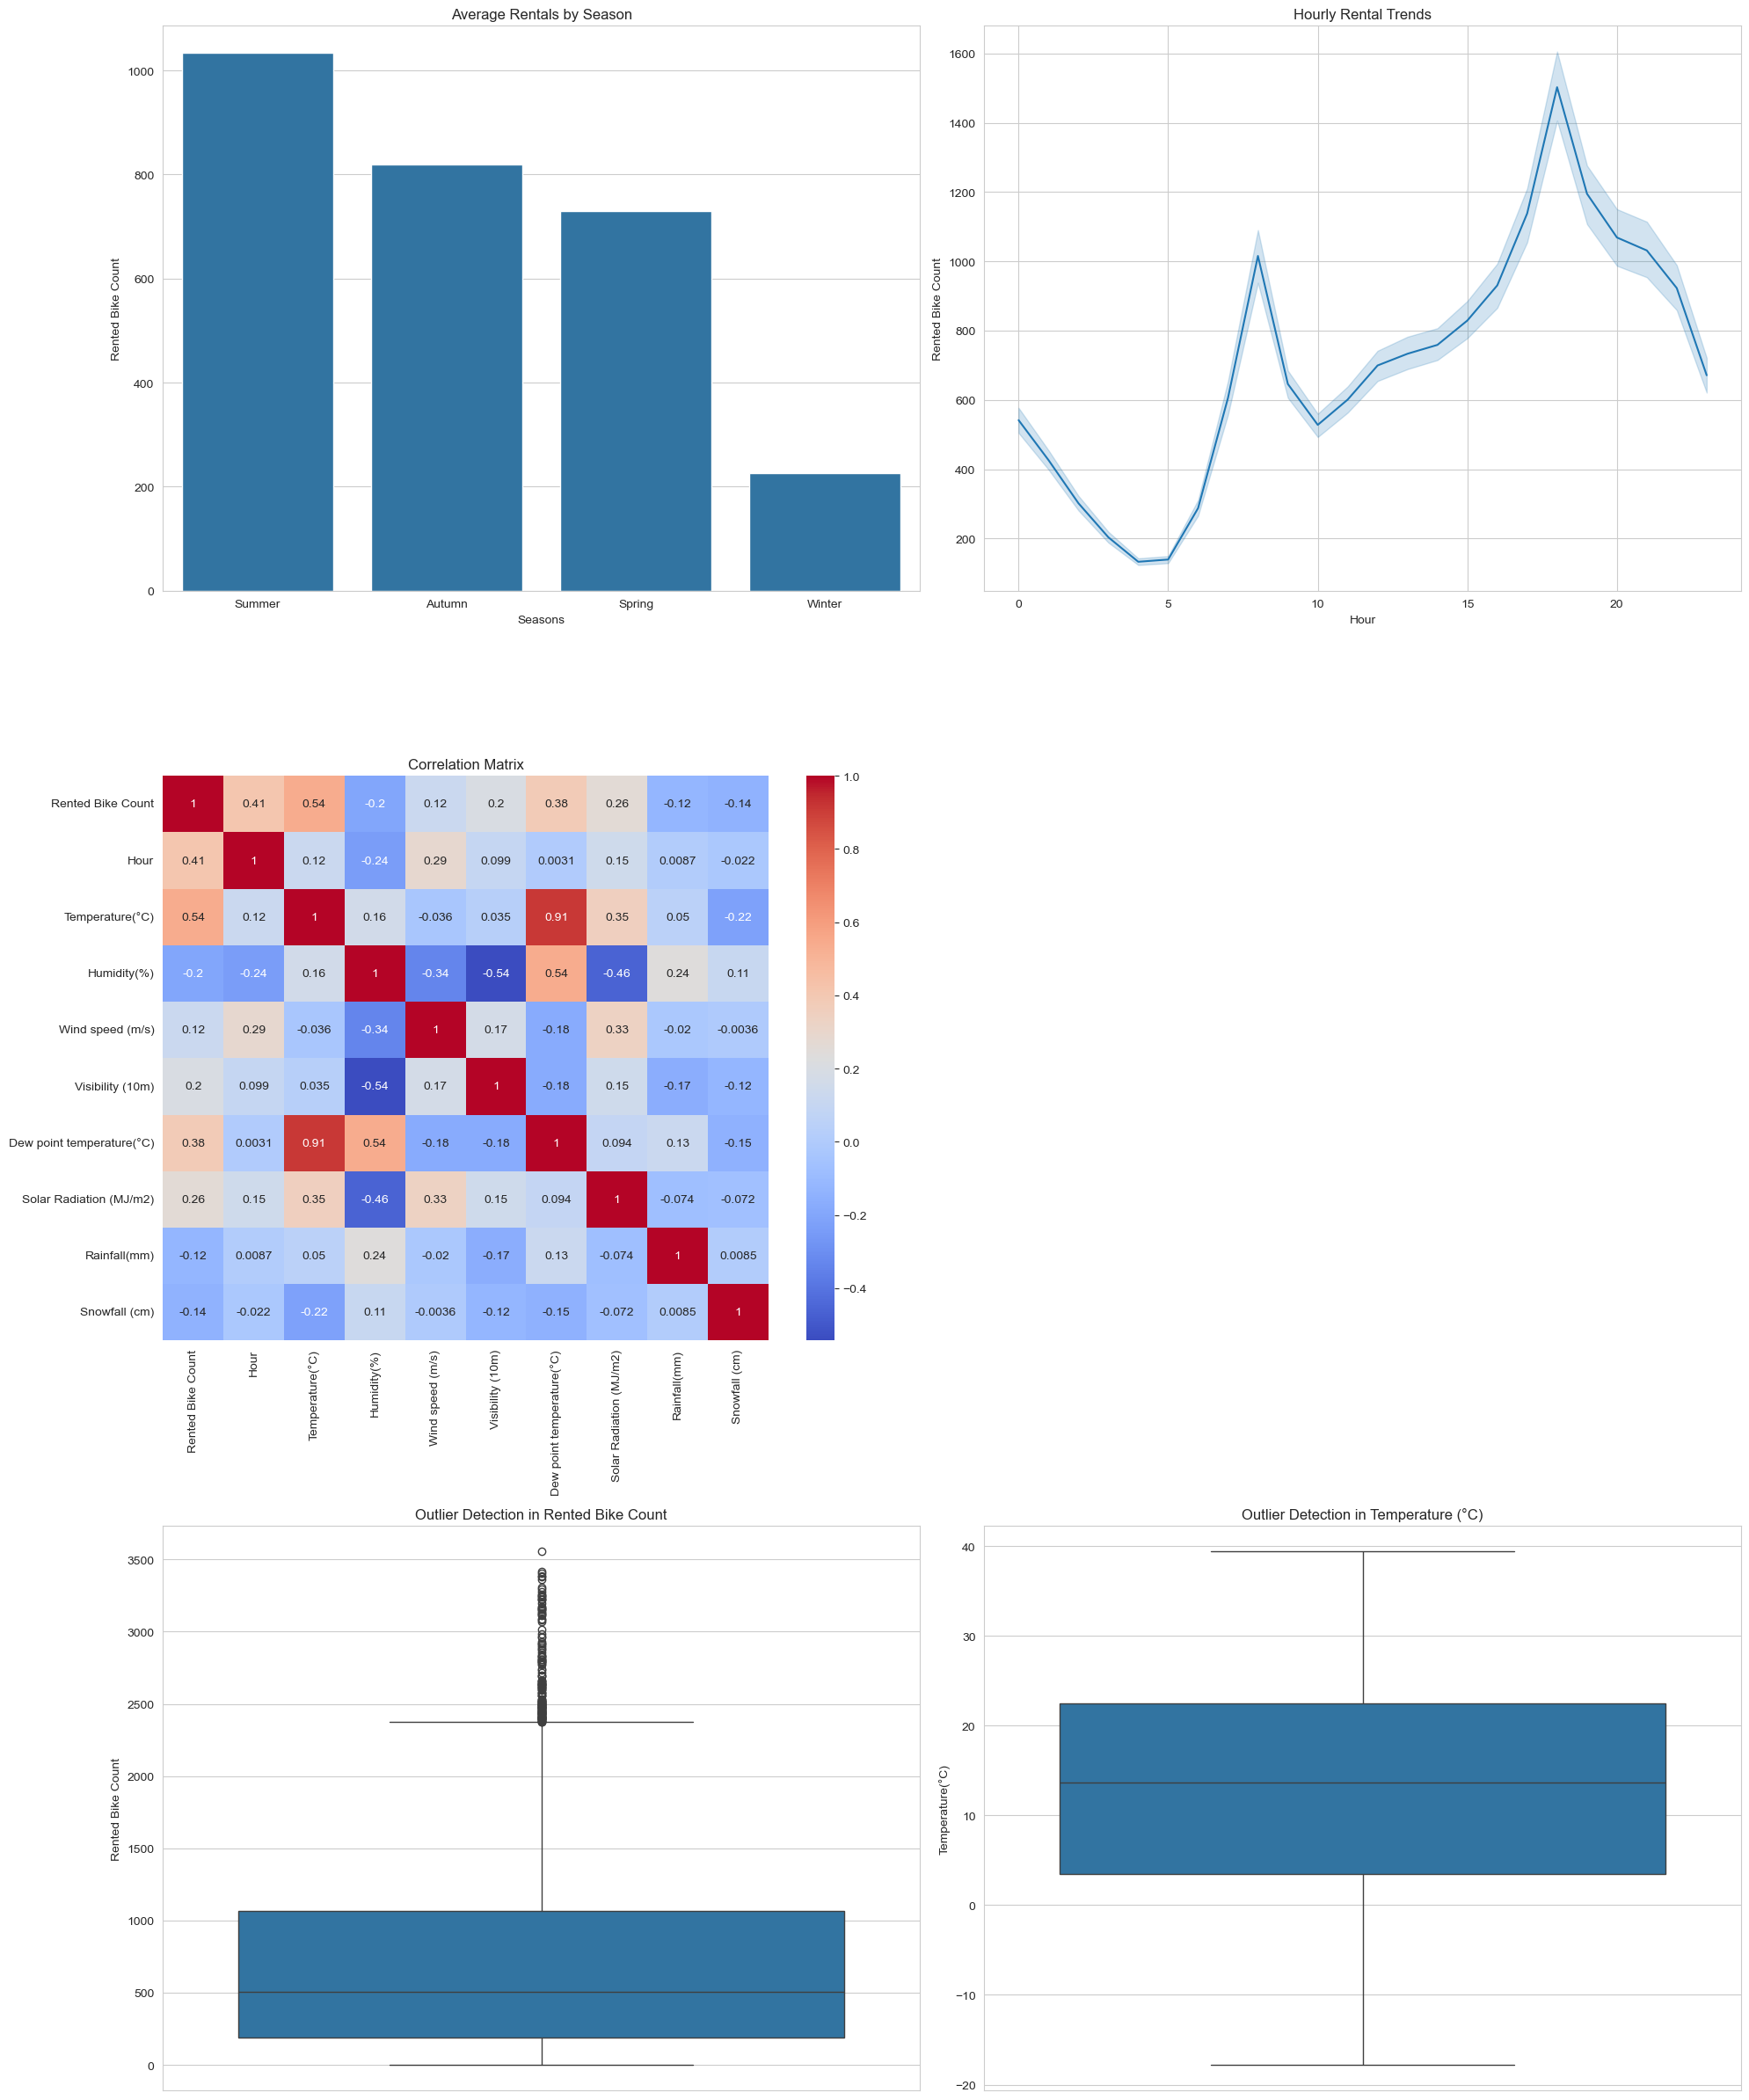

In [5]:
# =======================================================
# Create a figure with 3x2 subplots for better organization
# =======================================================
# Create a 3x2 grid to fit all plots
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# --- Row 1 ---
# Bar Plot (Top-Left)
sns.barplot(ax=axes[0, 0], x='Seasons', y='Rented Bike Count', data=seasonal_avg)
axes[0, 0].set_title('Average Rentals by Season')

# Line Plot (Top-Right)
sns.lineplot(ax=axes[0, 1], x='Hour', y='Rented Bike Count', data=df)
axes[0, 1].set_title('Hourly Rental Trends')

# --- Row 2 ---
# Heatmap (takes up the whole second row)
# Select only numerical columns and calculate the correlation
numerical_cols = df.select_dtypes(include=np.number)
corr_matrix = numerical_cols.corr()

# Now you can create the heatmap because corr_matrix exists
sns.heatmap(ax=axes[1, 0], data=corr_matrix, annot=True, cmap='coolwarm')
axes[1, 0].set_title('Correlation Matrix')
fig.delaxes(axes[1, 1]) # Delete the unused subplot on the right

# --- Row 3 ---
# Box Plot 1 (Bottom-Left)
sns.boxplot(ax=axes[2, 0], y=df['Rented Bike Count'])
axes[2, 0].set_title('Outlier Detection in Rented Bike Count')

# Box Plot 2 (Bottom-Right)
sns.boxplot(ax=axes[2, 1], y=df['Temperature(°C)'])
axes[2, 1].set_title('Outlier Detection in Temperature (°C)')

plt.tight_layout()
plt.show()

## Task 5: Flag and Investigate Outliers

In [6]:
#  Flag and Investigate Outliers

# =======================================================
#  OUTLIER FLAGGING AND INVESTIGATION
# =======================================================
# Identify the threshold for outliers (e.g., anything above the 99th percentile)
outlier_threshold = df['Rented Bike Count'].quantile(0.99)

# Filter for days where rentals exceeded this threshold
extreme_rentals = df[df['Rented Bike Count'] > outlier_threshold]

# Display the top 5 dates with the highest rental counts
print("--- Top 5 Dates with Extreme Rental Spikes ---")
display(extreme_rentals.sort_values('Rented Bike Count', ascending=False).head())


--- Top 5 Dates with Extreme Rental Spikes ---


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4818,19-06-2018,3556,18,24.100000,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes
4866,21-06-2018,3418,18,27.799999,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes
4650,12-06-2018,3404,18,24.900000,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4842,20-06-2018,3384,18,27.000000,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
4458,04-06-2018,3380,18,24.400000,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes


## Task 6: Insights & Business Recommendations

-----




## 💡 Insights & Business Recommendations

Based on the analysis, here are key insights and actionable recommendations for BikeEase.

### Key Insights:
1.  **Strong Seasonality:** Bike rentals peak in the **Summer** and are lowest in the **Winter**. This shows a strong dependence on weather and seasons.
2.  **Peak Commuting Hours:** Rentals spike significantly during morning (around **8 AM**) and evening (around **6 PM**) commute times, indicating heavy usage by professionals.
3.  **Temperature is Key:** The heatmap shows a strong positive correlation (**0.54**) between `Temperature(°C)` and `Rented Bike Count`. Warmer days lead to more rentals. `Hour` also has a strong positive correlation (**0.41**).
4.  **Holiday Impact:** Fewer bikes are rented on holidays compared to regular working days, suggesting the primary user base is commuters rather than tourists.
5.  **Outliers Exist:** The box plot shows a number of high-value outliers for `Rented Bike Count`, likely corresponding to special events or perfect weather days.

### Actionable Recommendations:
* **Dynamic Resource Allocation:**
    * **Recommendation:** Increase the number of available bikes and maintenance staff during the **Summer** and allocate more bikes to business districts ahead of the **8 AM** and **6 PM** peaks.
    * **Action:** Conversely, reduce operational costs during Winter by storing a portion of the fleet.
* **Targeted Marketing Campaigns:**
    * **Recommendation:** Launch marketing campaigns in late **Spring** to build momentum for the peak Summer season. Offer special promotions on weekends to attract more leisure riders.
    * **Action:** Create a "commuter pass" for users who frequently rent during peak hours.
* **Demand Forecasting with Weather Data:**
    * **Recommendation:** Integrate a reliable weather forecast API. Since temperature is a key driver, use temperature forecasts to predict daily demand.
    * **Action:** Develop a simple predictive model where `Predicted Rentals = f(Temperature Forecast, Hour, IsHoliday)`. This will help optimize bike distribution with high accuracy.
